Training with optimizer=adam, lr=0.01, batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.13550, saving model to best_model_manual.h5



Epoch 2: val_loss improved from 0.13550 to 0.09858, saving model to best_model_manual.h5



Epoch 3: val_loss did not improve from 0.09858

Epoch 4: val_loss did not improve from 0.09858

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 5: val_loss did not improve from 0.09858

Epoch 6: val_loss improved from 0.09858 to 0.09587, saving model to best_model_manual.h5



Epoch 7: val_loss improved from 0.09587 to 0.09038, saving model to best_model_manual.h5



Epoch 8: val_loss did not improve from 0.09038

Epoch 9: val_loss improved from 0.09038 to 0.09026, saving model to best_model_manual.h5



Epoch 10: val_loss did not improve from 0.09026

Epoch 11: val_loss did not improve from 0.09026

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 12: val_loss did not improve from 0.09026

Epoch 13: val_loss did not improve from 0.09026

Epoch 14: val_loss did not improve from 0.09026
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 9.
Training with optimizer=adam, lr=0.01, batch_size=64

Epoch 1: val_loss did not improve from 0.09026

Epoch 2: val_loss did not improve from 0.09026

Epoch 3: val_loss did not improve from 0.09026

Epoch 4: val_loss did not improve from 0.09026

Epoch 5: val_loss did not improve from 0.09026

Epoch 6: val_loss did not improve from 0.09026

Epoch 7: val_loss did not improve from 0.09026

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 8: val_loss did not improve from 0.09026

Epoch 9: val_loss did not improve from 0.09026

Epoch 10: val_loss did not impr


Epoch 3: val_loss improved from 0.08687 to 0.07547, saving model to best_model_manual.h5



Epoch 4: val_loss did not improve from 0.07547

Epoch 5: val_loss did not improve from 0.07547

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 6: val_loss did not improve from 0.07547

Epoch 7: val_loss improved from 0.07547 to 0.06697, saving model to best_model_manual.h5



Epoch 8: val_loss improved from 0.06697 to 0.06195, saving model to best_model_manual.h5



Epoch 9: val_loss improved from 0.06195 to 0.06025, saving model to best_model_manual.h5



Epoch 10: val_loss improved from 0.06025 to 0.06013, saving model to best_model_manual.h5



Epoch 11: val_loss did not improve from 0.06013

Epoch 12: val_loss did not improve from 0.06013

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 13: val_loss did not improve from 0.06013

Epoch 14: val_loss did not improve from 0.06013

Epoch 15: val_loss did not improve from 0.06013
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.
Training with optimizer=rmsprop, lr=0.01, batch_size=64

Epoch 1: val_loss did not improve from 0.06013

Epoch 2: val_loss did not improve from 0.06013

Epoch 3: val_loss did not improve from 0.06013

Epoch 4: val_loss did not improve from 0.06013

Epoch 5: val_loss did not improve from 0.06013

Epoch 6: val_loss did not improve from 0.06013

Epoch 7: val_loss did not improve from 0.06013

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 8: val_loss did not improve from 0.06013

Epoch 9: val_loss did not improve from 0.06013

Epoch 10: val_loss did not 

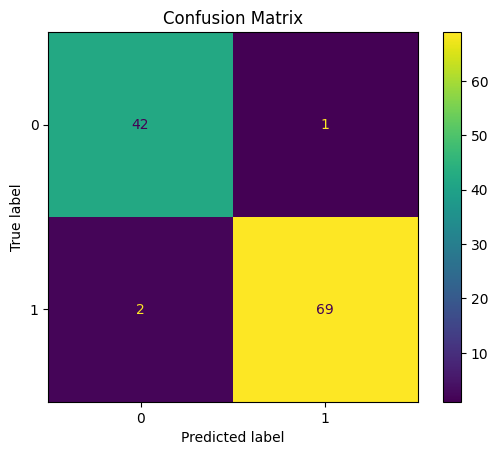

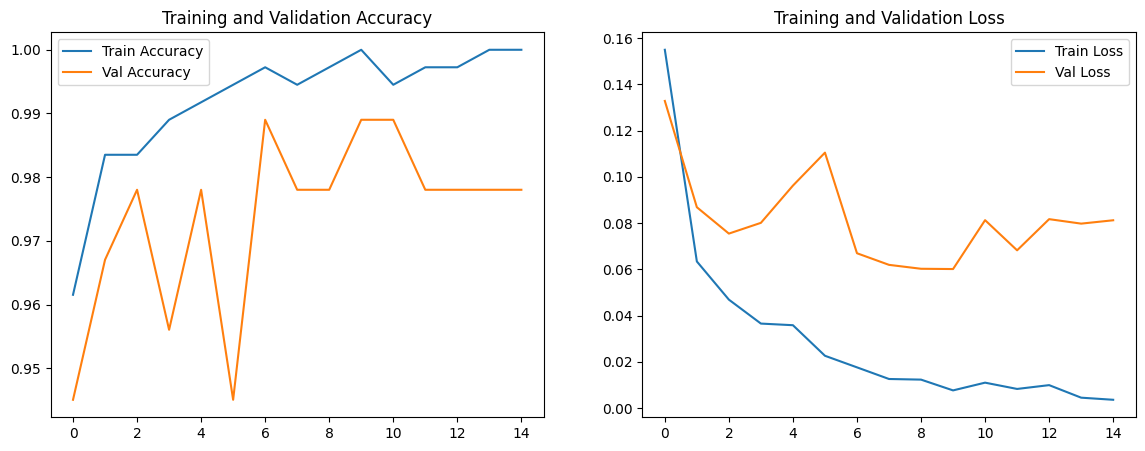

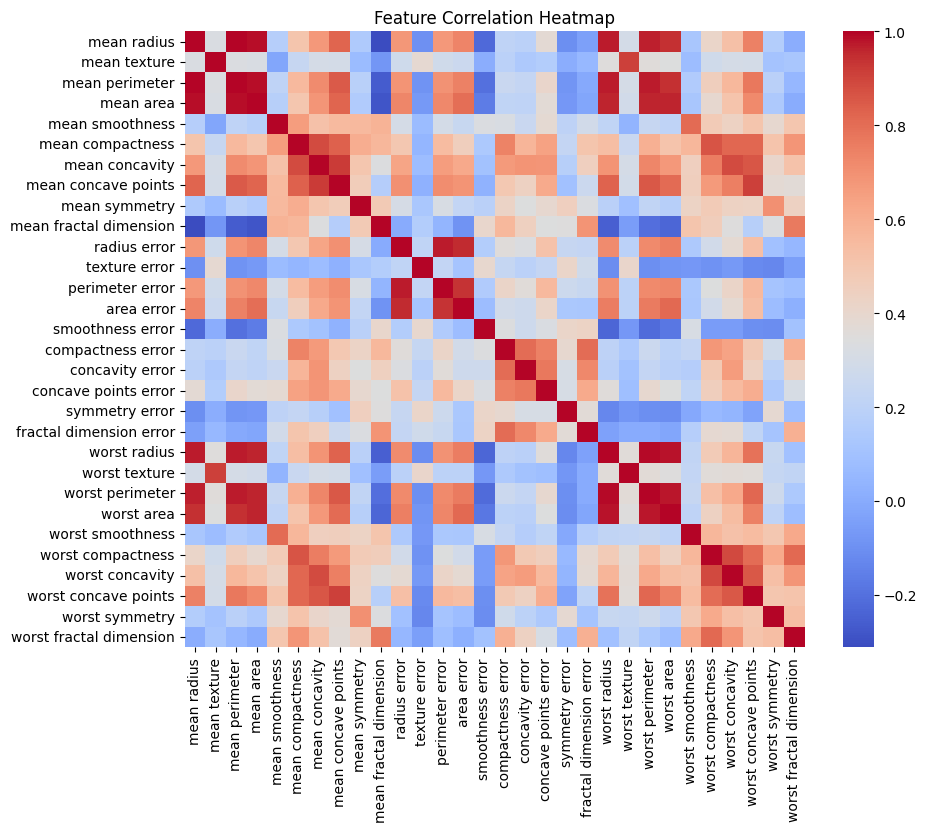

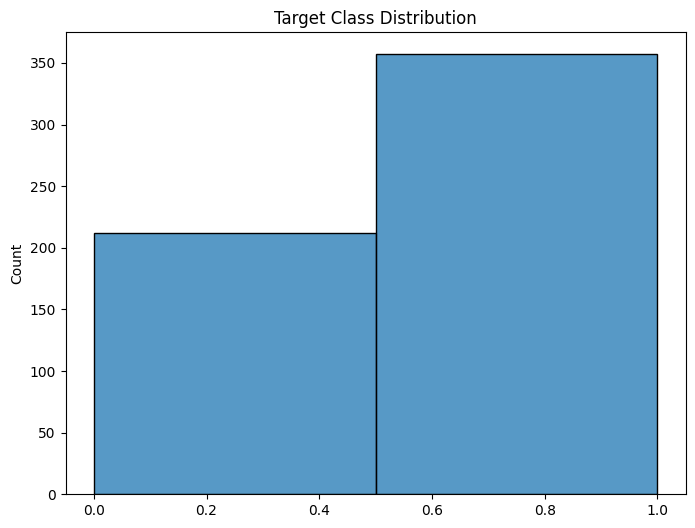

  optimizer  learning_rate  batch_size  val_accuracy
0      adam          0.010          32      0.978022
1      adam          0.010          64      0.967033
2      adam          0.001          32      0.967033
3      adam          0.001          64      0.945055
4   rmsprop          0.010          32      0.989011
5   rmsprop          0.010          64      0.967033
6   rmsprop          0.001          32      0.978022
7   rmsprop          0.001          64      0.978022


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Load and preprocess data
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_manual.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Model builder function
def build_model(optimizer, learning_rate):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Manual grid search
results = []
best_val_acc = 0
best_model = None
best_history = None
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.01, 0.001],
    'batch_size': [32, 64]
}

for opt in param_grid['optimizer']:
    for lr in param_grid['learning_rate']:
        for bs in param_grid['batch_size']:
            print(f"Training with optimizer={opt}, lr={lr}, batch_size={bs}")
            model = build_model(opt, lr)
            history = model.fit(X_train, y_train, epochs=30, batch_size=bs,
                                validation_split=0.2, callbacks=callbacks, verbose=0)
            val_acc = max(history.history['val_accuracy'])
            results.append({'optimizer': opt, 'learning_rate': lr, 'batch_size': bs, 'val_accuracy': val_acc})
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model = model
                best_history = history

# Test evaluation
y_pred = (best_model.predict(X_test) > 0.5).astype("int32").flatten()
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
fig1, ax1 = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(ax=ax1)
ax1.set_title("Confusion Matrix")
plt.show()

# Training and validation accuracy/loss plot
fig2, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(best_history.history['accuracy'], label='Train Accuracy')
axs[0].plot(best_history.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

axs[1].plot(best_history.history['loss'], label='Train Loss')
axs[1].plot(best_history.history['val_loss'], label='Val Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()
plt.show()

# Feature correlation heatmap
fig3, ax3 = plt.subplots(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X, columns=data.feature_names).corr(), cmap='coolwarm', ax=ax3)
ax3.set_title('Feature Correlation Heatmap')
plt.show()

# Target class distribution
fig4, ax4 = plt.subplots(figsize=(8, 6))
sns.histplot(y, bins=2)
ax4.set_title('Target Class Distribution')
plt.show()

# Display grid search results
results_df = pd.DataFrame(results)
print(results_df)
